# **Boston Airbnb Data Analysis**


1.   **Following CRISP-DM methodology**
2.   Used Data files

    * listings.csv
    * reviews.csv

-----------------------------------------------------

1.   Business Understanding (CRISP-DM)

    * Which neighbourhood have high prices?
    * Which street is richest? - By our data, we can analyze which streets are Top 5 richest!
    * Relationship between Positive & Negative words in review data & review_scores, price

2.   Data Understanding

3.   Data Preparation
    * Data Preprocessing
    * Filling NAN Values
--------- In this Project, I don't need to make my own model ----------
4.   Modeling 
5. Evaluation

6. Deployment










# **Business Understanding**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from tqdm import tqdm

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Project1_boston_seatle/boston/listings.csv')

### **Q1) Which neighbourhood have high prices?**

### Price preprocessing

In [16]:
price_b = []
for i in df['price']:
  price_b.append(float(i[1:].replace(',','')))
df['price'] = price_b

#### **Visualization**

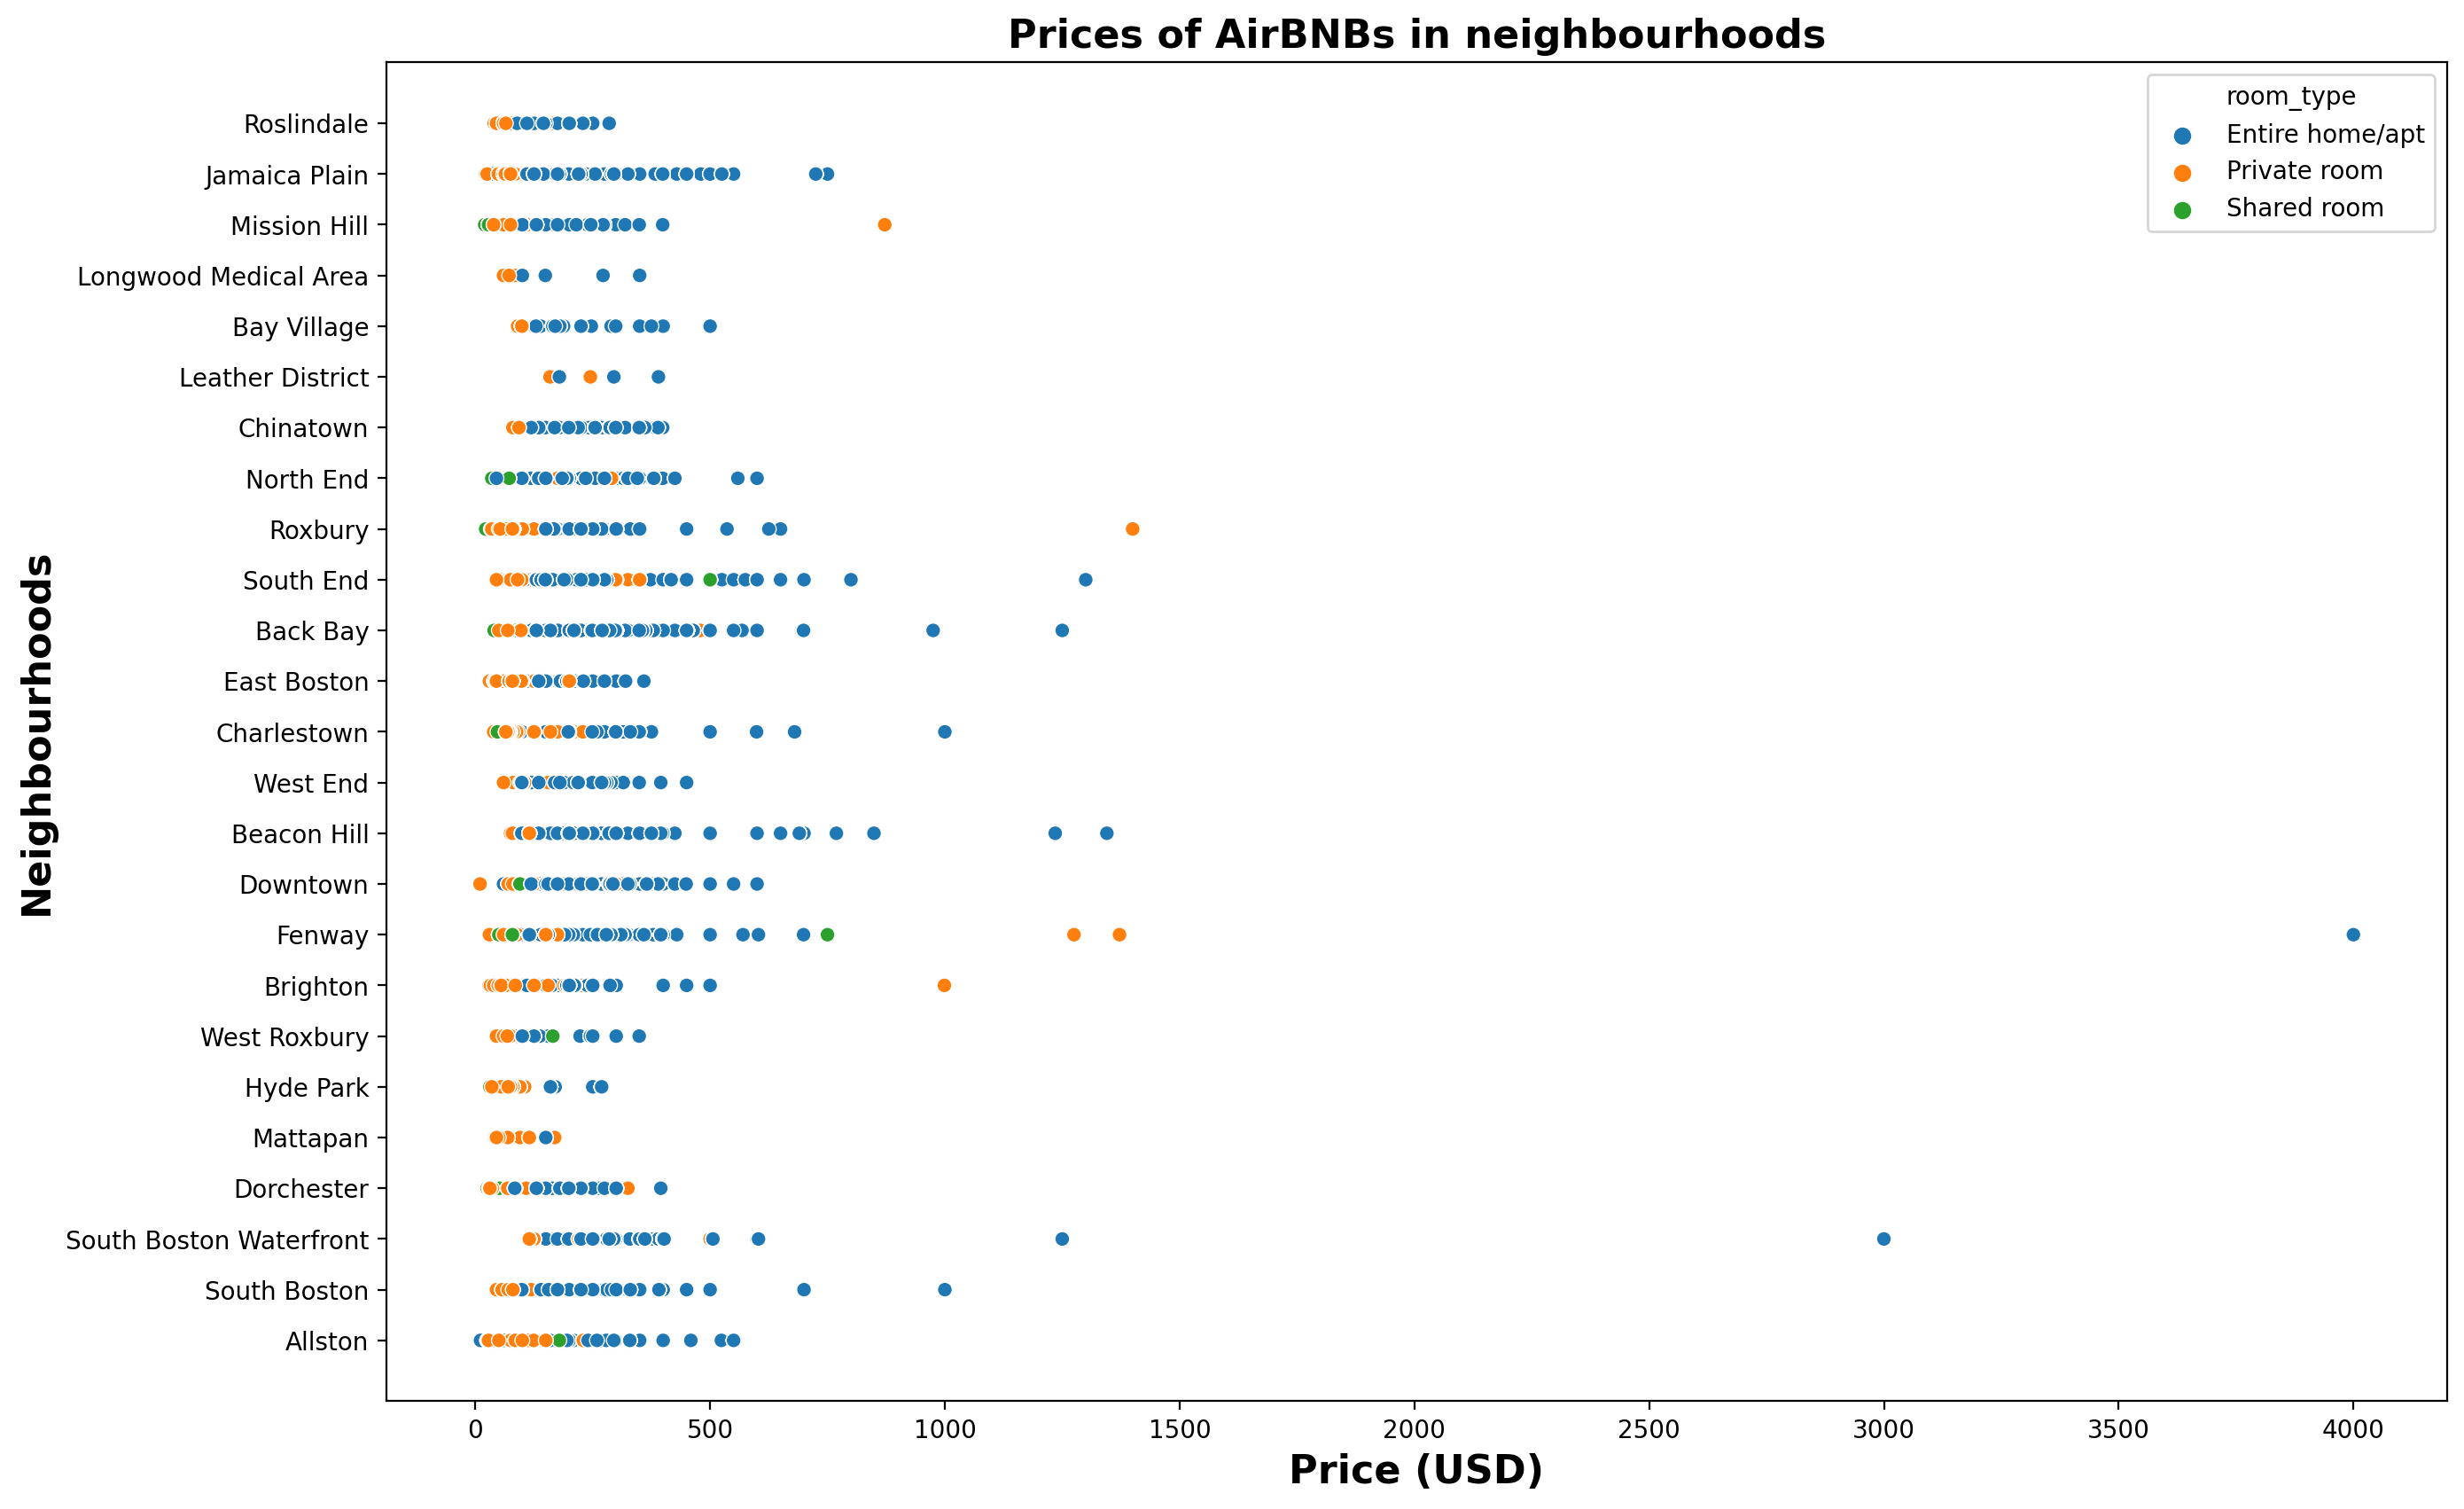

In [37]:
plt.figure(figsize=(15, 10), dpi=200)
plt.title('Prices of AirBNBs in neighbourhoods', size = 16, weight = 'bold');
plt.ylabel('Neighbourhoods', size = 16, weight = 'bold');
plt.xlabel('Price (USD)', size = 16, weight = 'bold');
base_color = sns.color_palette()[0]
sns.scatterplot(x='price', y='neighbourhood_cleansed',hue='room_type',data=df); # https://seaborn.pydata.org/generated/seaborn.scatterplot.html

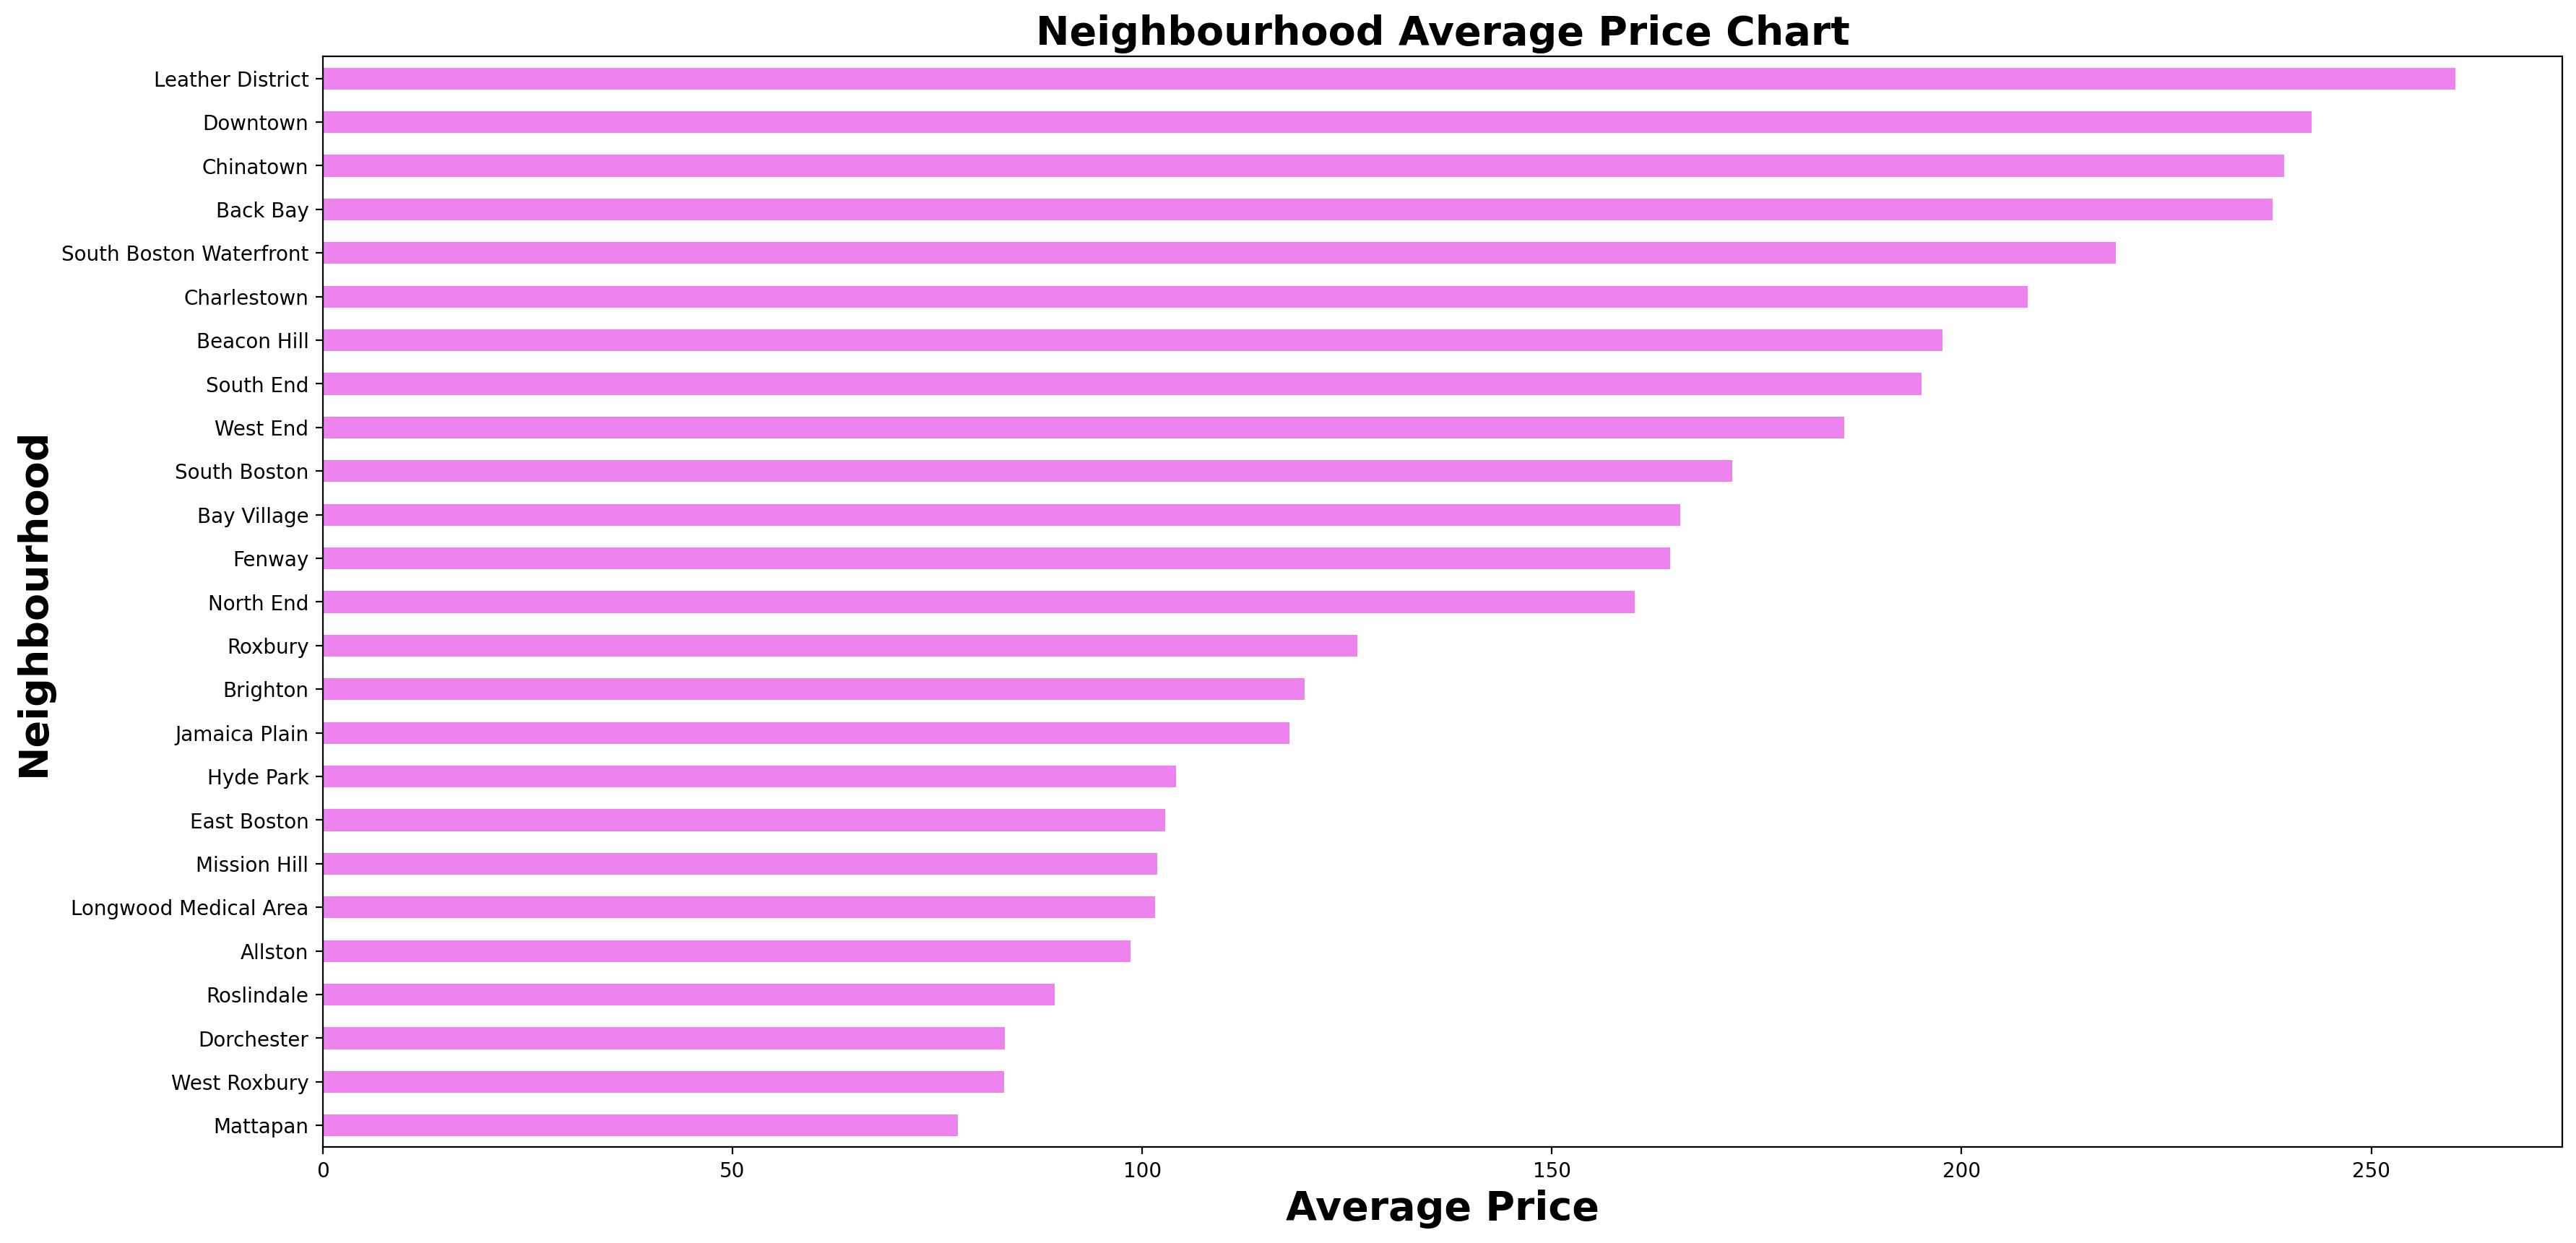

In [36]:
price_per_neighbourhood = df.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending = True)
plt.figure(figsize=(20,10), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='violet');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);

#### **Result**

Thus, we can conclude that Leather District has the highest price amongst other neighbourhoods.

### **Q2) Which street is most expensive?**

#### **Preprocessing Street Column**

- From street column, Extracting Street Name

In [19]:
a = list(df['street'].values)          # copy street column's values
for i in range(len(a)):                # split street column's data basis of ','
  df['street'][i] = a[i].split(',')[0]

#### **Visualization**

- Top 5 Rich Street By Our Data

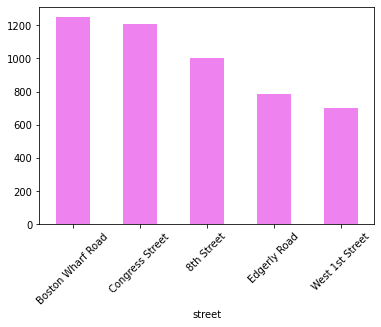

In [20]:
# Using groupby function, we can sort those values

a = df.groupby(df['street'])['price'].mean().sort_values(ascending = False).head(5)
a.plot(kind = 'bar', color = 'violet');
plt.xticks(rotation=45);

#### **Result**

By google map, these streets are near by ocean!

Actually, I'm not living in boston(I'm korean). But I can guess that those streets are rich.

### **Q3) Relationship between Review of AIRBNB Data & Host info**

I wondered about relationship between review data and host-info!

At first, I counted positive & negative words in review data.

And merged this data with DataFrame 'df'

#### **Preprocessing**

*  **Counting Postive & Negative words in Review Data**
*  **Merging DataFrame**
*  **Filling Missing Values (-1)**

In [21]:
df_re = pd.read_csv('/content/drive/MyDrive/Project1_boston_seatle/boston/reviews.csv')
df_re

def word_counting(df, column, feature):
  '''
        This function makes given dataframe's column data split and counts words!
  '''
  ls = []
  for c in range(68275):
    n = 0
    try:
      for i in df[column][c].split():
        if i in feature:
          n += 1
        else:
          pass
    except:
      n = 0
    ls.append(n)
  return ls

# --------------------- Merging -------------------# 
feature_bad = ['bad', 'dirty', 'uncomfortable', 'terrible', 'Bad', 'Dirty', 'Uncomfortable', 'sucio', 'malo', 'incómodo']
feature_good = ['good', 'clean', 'nice', 'great', 'Great', 'Nice', 'comfortable', 'Good', 'cool', 'Cool', 'Clean', 'enjoyed', 'bien', 'ajustado', 'cozy', 'Cozy']

df_re['counts_good'] = word_counting(df_re, 'comments', feature_good)
df_re['counts_bad'] = word_counting(df_re, 'comments', feature_bad)

df_re = df_re[['listing_id', 'counts_good', 'counts_bad']]
df_re.columns = ['id', 'counts_good', 'counts_bad']
df = pd.merge(df, df_re, on = 'id', how = 'left')

#### **Visualization**

##### **Review values - Word counts**

100%|██████████| 7/7 [00:10<00:00,  1.54s/it]


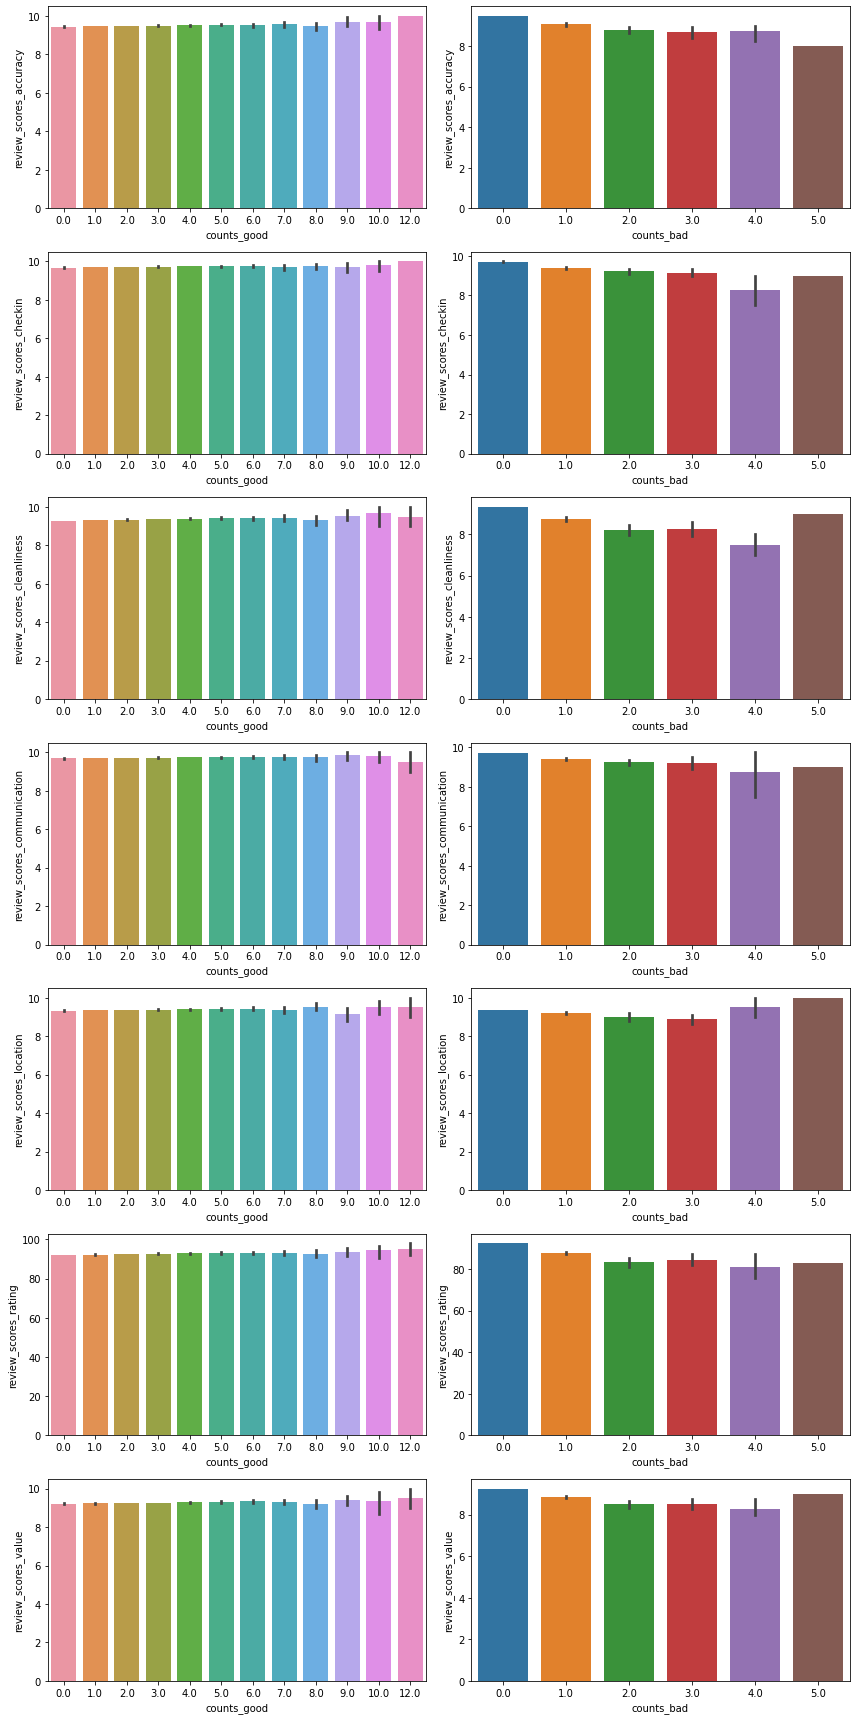

In [22]:
review_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']

fig, ax = plt.subplots(len(review_cols), 2, figsize=(12,24))

for i in tqdm(range(len(review_cols))):         
  sns.barplot(df['counts_good'], df[review_cols[i]], ax = ax[i, 0])
  sns.barplot(df['counts_bad'], df[review_cols[i]], ax = ax[i, 1])

plt.tight_layout()
plt.show()

With above graphs, we can see that Cleanliness have clear relation with counts_bad column! It means customer's reviews are almost about cleanliness review!

##### **Price - Word counts**

100%|██████████| 7/7 [00:10<00:00,  1.55s/it]


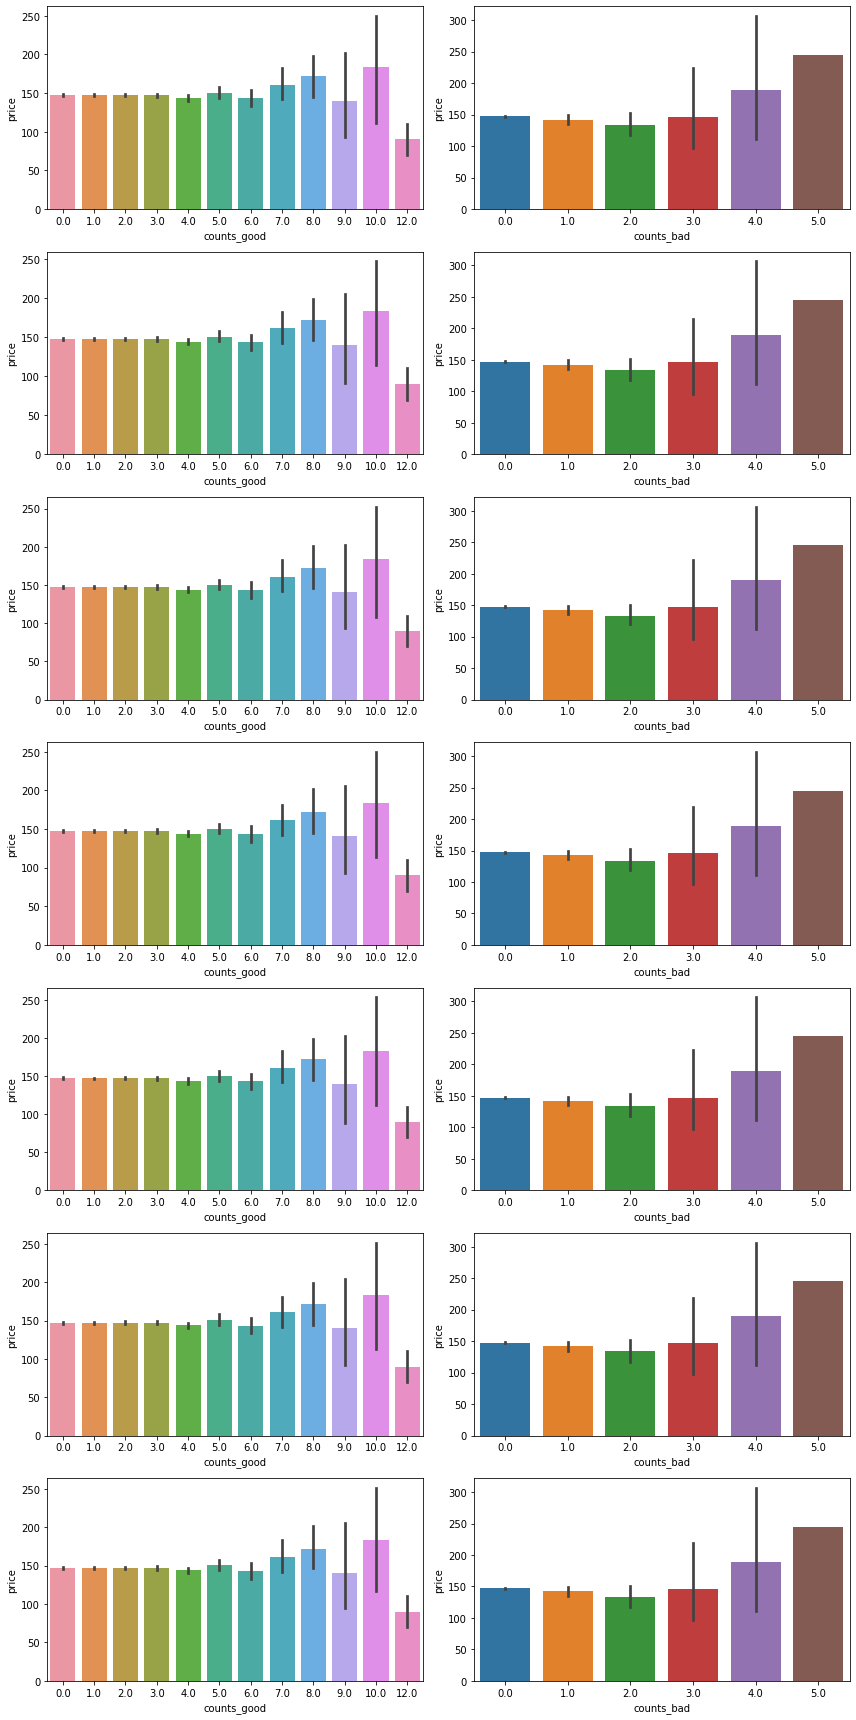

In [23]:
review_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']

fig, ax = plt.subplots(len(review_cols), 2, figsize=(12,24))

for i in tqdm(range(len(review_cols))):
  sns.barplot(df['counts_good'], df['price'], ax = ax[i, 0])
  sns.barplot(df['counts_bad'], df['price'], ax = ax[i, 1])

plt.tight_layout()
plt.show()

#### **Result**

We can see that both distributions of Review values which are seperated by P&N words counts are different!

*   We can conclude that this data is reliable!

If you wanna get more customer, you should analyze of review data and make your own strategy.

There are many bad places that cost more expensive than good places.
I conclude that those who own airbnb which had bad review should change their place cost!


# **Data Preparation**

## Filing missing values

If column's data type is object, I filled missing values with 'nan'

Else, I filled -1.

In [27]:
df.isnull().sum().sort_values(ascending = False)  # sorting counts of missing values

has_availability                69031
jurisdiction_names              69031
license                         69031
neighbourhood_group_cleansed    69031
square_feet                     67246
                                ...  
state                               0
neighbourhood_cleansed              0
street                              0
host_identity_verified              0
id                                  0
Length: 97, dtype: int64

In [28]:
for i in df.columns:
  if df[i].dtypes == object:
    df[i] = df[i].fillna('nan')
  else:
    df[i] = df[i].fillna(-1)

df.isnull().sum().max()  # checking result

id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
counts_good                         0
counts_bad                          0
Length: 97, dtype: int64